# Making ocean maps with NASA satellite data

In [2]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# References

For netCDF (.nc) data file generation:
https://giovanni.gsfc.nasa.gov/giovanniReferences

The below code was modified from this NASA tutorial, which explains how to read netCDF ocean data into Python:
https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20read%20and%20plot%20NetCDF%20MERRA-2%20data%20in%20Python

Cartopy package details:
https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/advanced_plotting.html

In [3]:
data = Dataset('g4.timeAvgMap.MODISA_L3m_CHL_Mo_4km_R2022_0_chlor_a.20021001-20221130.120E_20N_140E_40N.nc', mode='r')
#data = Dataset('g4.timeAvgMap.MODISA_L3m_NSST_Monthly_4km_R2019_0_sst.20190601-20190630.82W_27N_50W_46N.nc', mode='r')

In [4]:
data.variables

{'MODISA_L3m_CHL_Mo_4km_R2022_0_chlor_a': <class 'netCDF4._netCDF4.Variable'>
 float32 MODISA_L3m_CHL_Mo_4km_R2022_0_chlor_a(lat, lon)
     _FillValue: -32767.0
     coordinates: lat lon
     display_max: 20.0
     display_min: 0.01
     display_scale: log
     product_short_name: MODISA_L3m_CHL
     product_version: R2022.0
     quantity_type: Chlorophyll
     reference: Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a algorithms for oligotrophic oceans: A novel approach based on three-band reflectance difference, J. Geophys. Res., 117, C01011, doi:10.1029/2011JC007395.
     standard_name: mass_concentration_of_chlorophyll_in_sea_water
     valid_max: 100.0
     valid_min: 0.008
     units: mg m-3
     long_name: Chlorophyll a concentration (water only)
     cell_methods: time: mean
     latitude_resolution: 0.041672
     longitude_resolution: 0.041672
 unlimited dimensions: 
 current shape = (480, 480)
 filling on,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
  

In [5]:
#Assign the netCDF variable of interest to a python variable
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]
chl = data.variables['MODISA_L3m_CHL_Mo_4km_R2022_0_chlor_a'][:][:][:]
#temp = data.variables['MODISA_L3m_NSST_Monthly_4km_R2019_0_sst'][:][:][:]

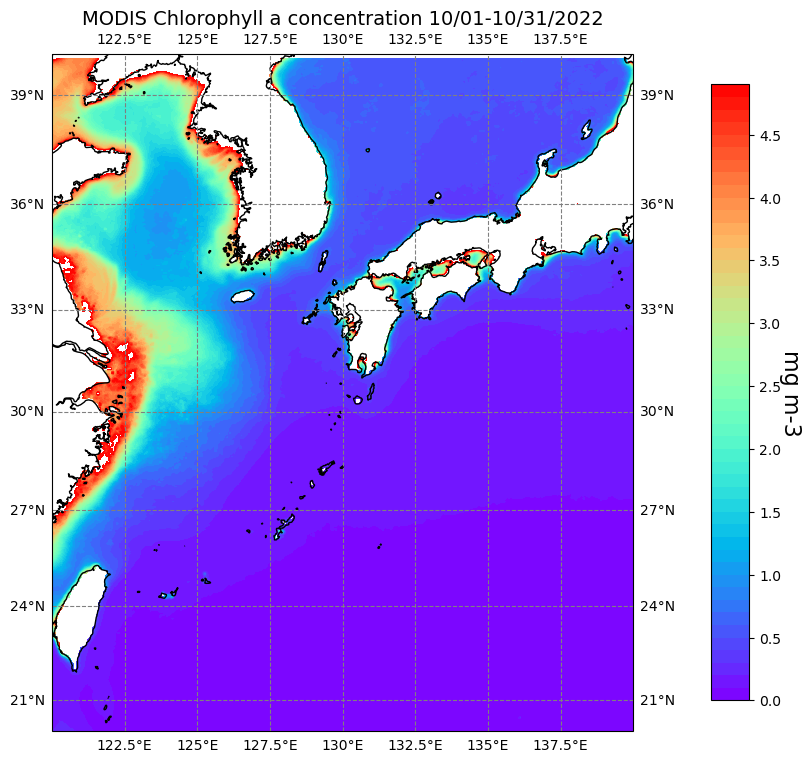

In [8]:
# Modified from: https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20read%20and%20plot%20NetCDF%20MERRA-2%20data%20in%20Python

# Set the figure size, projection, and extent
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([120, 140, 20, 40])
ax.coastlines(resolution="10m",linewidth=1)
ax.gridlines(draw_labels=True, linestyle='--',color='gray')

# Set contour levels, then draw the plot and a colorbar
clevs = np.arange(0,5,.1)
#clevs = np.arange(0,40,.5)
plt.contourf(lon, lat, chl, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.rainbow)
#plt.contourf(lon, lat, temp, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.CMRmap)
plt.title('MODIS Chlorophyll a concentration 10/01-10/31/2022', size=14)
#plt.title('MODIS Sea Surface Temperature 06/19-06/28/2019', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", aspect=16, shrink=0.8, pad=0.1)
cb.set_label('mg m-3',size=16,rotation=270,labelpad=15)
#cb.set_label('deg C',size=16,rotation=270,labelpad=15)
cb.ax.tick_params(labelsize=10)


ax.plot(-64.1678, 31.669, 'ko', markersize=10, transform=ccrs.Geodetic())
ax.text(-65.5, 30.8, 'BATS/St. 1', size=12, transform=ccrs.Geodetic())
ax.plot(-70.6712, 41.5242, 'ko', markersize=10, transform=ccrs.Geodetic())
ax.text(-70, 41, 'WHOI', size=12, transform=ccrs.Geodetic())



In [11]:
fig.savefig('MODIS_chl.png', format='png', dpi=360)